# **Proyecto 1 - Relación Minutos Ingresos**
**Intengrates del equipo:** 

Javier Callejas Cardozo

Oscar Ivan Echeverria Marrugo

Fabian Andrés Parrado Velásquez

Xiomara Grisales Henao 



### **Diccionario**

**Variables**

totrev: Ingresos del cliente.

totmou: Total de minutos usados por el cliente.

creditcd: Indicador de tarjeta de crédito.

eqpdays: Número de días (antigüedad) del equipo actual.

| **Variable** | **Definición**                               | **Valores**                 | **Naturaleza** |
|---------------|-----------------------------------------------|-----------------------------|----------------|
| **totrev**    | Ingresos del cliente                          |                             | Cuantitativa   |
| **totmou**    | Total de minutos usados por el cliente        |                             | Cuantitativa   |
| **creditcd**  | Indicador de tarjeta de crédito               | [N\|no] = No, [Y\|yes] = Sí | Cualitativa    |
| **eqpdays**   | Número de días (antigüedad) del equipo actual |                             | Cuantitativa   |

## **Explicación breve del problema:**

El problema en cuestión busca explorar la relación entre el total de minutos usados por los clientes (columna totmou) y los ingresos totales generados por esos clientes (columna totrev) en una empresa de telecomunicaciones. La pregunta clave es: ¿Existe una relación entre estos dos aspectos?

La empresa contiene una gran cantidad de clientes y hacer el análisis uno a uno no es lo óptimo. Con ayuda de la programación y el análisis de datos, se logrará llegar a conclusiones rápidas y acertadas para encontrar relaciones que a simple vista no son tenidas en cuenta.

## **Exploración descriptiva de los datos**

Para iniciar, se requiere cargar las librarías necesarias, en caso de necesitar otras puede agregarlas a la celda.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Se importa el archivo y se revisan los datos contenidos en Credito_dias.csv

In [31]:
#df=pd.read_csv('../Datos/Credito_dias.csv',index_col="Customer_ID")
url = 'https://raw.githubusercontent.com/ccjaviers777/actividad_1_ml/main/Datos/Credito_dias.csv'
df = pd.read_csv(url,index_col="Customer_ID")

Se revisan los 3 primeros y 3 últimos registros del dataset, así también como las colunas, índices, tipos de registros y obtenemos una muestra aleatoria para conocer más los datos a analizar y conocer su comportamiento 

In [33]:
display("primeros 3 registros",df.head(3))
display("3 últimos registros",df.tail(3))
display("Columnas:",df.columns)
display("Índices:",df.index)
display("Tipos de registros en el DataFrame",df.dtypes)
display("Muestra aleatoria de 3 registros",df.sample(3))

'primeros 3 registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675


'3 últimos registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1096497,3690.0,294.29,Y,212
1087248,3333.0,233.08,Y,290
1099003,5025.0,1436.49,Y,1029


'Columnas:'

Index(['totmou', 'totrev', 'creditcd', 'eqpdays'], dtype='object')

'Índices:'

Index([1082423, 1069232, 1031705, 1089806, 1076695, 1091652, 1043846, 1088967,
       1045239, 1046584,
       ...
       1087145, 1002540, 1044082, 1083458, 1093976, 1027614, 1098422, 1096497,
       1087248, 1099003],
      dtype='int64', name='Customer_ID', length=10000)

'Tipos de registros en el DataFrame'

totmou      float64
totrev      float64
creditcd     object
eqpdays       int64
dtype: object

'Muestra aleatoria de 3 registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1065455,6891.00,930.10,N,458
1000466,7792.04,2439.96,Y,1504
1093439,7951.00,835.59,Y,225


Revisamos la cantidad de columnas y filas del dataset

In [35]:
df.shape    # imprime el número de columnas y filas del DataFrame

(10000, 4)

Vemos información general del dataset

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1082423 to 1099003
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   totmou    10000 non-null  float64
 1   totrev    10000 non-null  float64
 2   creditcd  9848 non-null   object 
 3   eqpdays   10000 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 390.6+ KB


Veamos información relevante de la variable totmou

In [39]:
df['totmou']

Customer_ID
1082423     7269.0
1069232    13552.0
1031705     4152.0
1089806     1863.0
1076695     4155.0
            ...   
1027614     2570.0
1098422     2105.0
1096497     3690.0
1087248     3333.0
1099003     5025.0
Name: totmou, Length: 10000, dtype: float64

In [40]:
df.creditcd

Customer_ID
1082423    Y
1069232    N
1031705    Y
1089806    Y
1076695    N
          ..
1027614    Y
1098422    Y
1096497    Y
1087248    Y
1099003    Y
Name: creditcd, Length: 10000, dtype: object

### **Datos duplicados**

Analizamos si el dataset contiene valores duplicados 

In [43]:
#Análisis de filas duplicadas en la DB, calculamos las filas antes de eliminar las repetidas
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')

#Eliminamos filas duplicadas de la DB
df = df.drop_duplicates()
#Impresión del tamaño del set luego de eliminar las duplicadas

print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')
#Se evidencia que no se encuentran valores duplicados
df

Tamaño del set antes de eliminar las filas repetidas: (10000, 4)
Tamaño del set después de eliminar las filas repetidas: (10000, 4)


,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


Finalmente, no se encontraron valores duplicados

### **Análisis de valores nulos**

Se calcula la cantidad de valores nulos por columna 

In [47]:
# Identificar valores nulos
display(df.isnull().sum())

totmou        0
totrev        0
creditcd    152
eqpdays       0
dtype: int64

Se calcula la cantidad de valores nulos por columna y su respectivo porcentaje, que para este caso solo la columna creditcd tiene valores nulos

In [49]:
# cantidad de valores nulos (datos faltantes) y su respectivo porcentaje en la base de datos

# cálculo de nulos por columna
nulos_por_columna = df.isnull().sum()
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

# cálculo de porcentaje de los valores nulos por columna
porcentaje_nulos = (columnas_con_nulos / len(df)) * 100
porcentaje_nulos = porcentaje_nulos.round(2)
columnas_con_nulos = pd.DataFrame({
    'Cantidad de Nulos': columnas_con_nulos,
    'Porcentaje de Nulos (%)': porcentaje_nulos
})
columnas_con_nulos

,Cantidad de Nulos,Porcentaje de Nulos (%)
creditcd,152,1.52


### **Cálculo de valores faltantes**

In [51]:
# cálculo del porcentaje de valores faltantes en todo el conjunto de datos

porcentaje_variables_val_faltantes = df.isnull().sum().sum() / df.size * 100
print("\nPorcentaje total de valores faltantes en el dataset: {:.2f}%".format(porcentaje_variables_val_faltantes))


Porcentaje total de valores faltantes en el dataset: 0.38%


No es un porcentaje significativo pero se procede a tratarlos

### **Manejo de datos perdidos o esperados**

In [54]:
df.isnull().any(axis=0) # Indicador de valores nulos en una columna

totmou      False
totrev      False
creditcd     True
eqpdays     False
dtype: bool

In [55]:
perd=df.isnull().any(axis=1) # Para saber si hay NaN en los datos de cada variable:
perd

Customer_ID
1082423    False
1069232    False
1031705    False
1089806    False
1076695    False
           ...  
1027614    False
1098422    False
1096497    False
1087248    False
1099003    False
Length: 10000, dtype: bool

In [56]:
# Filtrar y mostrar solo las filas donde 'perd' es True
df_con_nulos = df[perd]
print(df_con_nulos)


              totmou   totrev creditcd  eqpdays
Customer_ID                                    
1072218       5684.0   857.65      NaN      244
1066597        925.0   373.12      NaN      344
1023352      14466.0  2243.76      NaN      387
1045521       2504.0   756.79      NaN      495
1001813      76260.0  5526.11      NaN      361
...              ...      ...      ...      ...
1050795      15591.0  1330.71      NaN      447
1096985       3011.0   522.14      NaN       74
1025203        853.0   650.34      NaN      780
1099258      33660.0  4247.85      NaN      206
1026149       1955.0   606.08      NaN      770

[152 rows x 4 columns]


In [57]:
range(len(df)) # Genera secuencia de índices que se pueden usar para íterar en el dataframe

range(0, 10000)

In [58]:
for i in df.index[:10]:  # primeros 10 indices del dataframe
    print(i)

1082423
1069232
1031705
1089806
1076695
1091652
1043846
1088967
1045239
1046584


In [59]:
df[perd] # devolverá todas las filas que tienen al menos un valor nulo

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1072218,5684.0,857.65,NaN,244
1066597,925.0,373.12,NaN,344
1023352,14466.0,2243.76,NaN,387
1045521,2504.0,756.79,NaN,495
1001813,76260.0,5526.11,NaN,361
...,...,...,...,...
1050795,15591.0,1330.71,NaN,447
1096985,3011.0,522.14,NaN,74
1025203,853.0,650.34,NaN,780


In [60]:
perdidos = df[df.isnull().any(axis=1)] # Hace lo mismo que df[perd] # devolverá todas las filas que tienen al menos un valor nulo
perdidos

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1072218,5684.0,857.65,NaN,244
1066597,925.0,373.12,NaN,344
1023352,14466.0,2243.76,NaN,387
1045521,2504.0,756.79,NaN,495
1001813,76260.0,5526.11,NaN,361
...,...,...,...,...
1050795,15591.0,1330.71,NaN,447
1096985,3011.0,522.14,NaN,74
1025203,853.0,650.34,NaN,780


In [61]:
df['creditcd'].value_counts(dropna=False) # frecuencia de cada valor en una columna,

creditcd
Y      6796
N      3052
NaN     152
Name: count, dtype: int64

### **Imputación de valores nulos**

Imputación de valores nulos con la moda

In [64]:
moda = df['creditcd'].mode()[0]
print(f'La moda en creditcd es: {moda}')

La moda en creditcd es: Y


In [65]:
df['creditcd'] = df['creditcd'].fillna("Y")# Reemplaza todos los valores faltantes (NaN) en la columna creditcd con el valor "Y"

In [66]:
# Se vuelve a verificar si existen datos nulos
df.isnull().any(axis=0)

totmou      False
totrev      False
creditcd    False
eqpdays     False
dtype: bool

In [67]:
df.head()

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222


In [68]:
# Se verifica la columna creditcd
df['creditcd'].value_counts(dropna=False)

creditcd
Y    6948
N    3052
Name: count, dtype: int64

In [69]:
df["creditcd"].count()

np.int64(10000)

### **Cálculo de estadísticas**

In [71]:
df.describe(include='all')

,totmou,totrev,creditcd,eqpdays
count,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2,NaN
top,NaN,NaN,Y,NaN
freq,NaN,NaN,6948,NaN
mean,7692.804866,1042.133807,NaN,386.794500
std,8657.917883,857.144895,NaN,252.720196
min,0.000000,11.100000,NaN,-5.000000
25%,2576.000000,526.787500,NaN,210.000000
50%,5262.000000,820.235000,NaN,338.000000
75%,9823.250000,1272.975000,NaN,522.000000


In [72]:
df["eqpdays"].min()

np.int64(-5)

La revisión del resultado anterior puede revelar inconsistencias en los registros y nos ayudará a decidir sobre algunos de ellos. El valor mínimo de la variable eqpdays (Número de días de antigüedad del equipo actual) debería ser positivo, lo que sugiere que podrían existir errores en la entrada de datos.

In [74]:
# Si el valor es menor que 0 (i < 0), reemplaza ese valor con 0. Si el valor es mayor o igual a 0, mantiene el valor original (i).
df["eqpdays"]=[0 if i<0 else i for i in df["eqpdays"] ] 

Revisamos que se haya ejecutado bien la línea del código

In [76]:
df.describe()

,totmou,totrev,eqpdays
count,10000.000000,10000.000000,10000.00000
mean,7692.804866,1042.133807,386.79920
std,8657.917883,857.144895,252.71297
min,0.000000,11.100000,0.00000
25%,2576.000000,526.787500,210.00000
50%,5262.000000,820.235000,338.00000
75%,9823.250000,1272.975000,522.00000
max,163264.176700,13426.600000,1823.00000


### **Exploratorio separado por cada una de las variables**

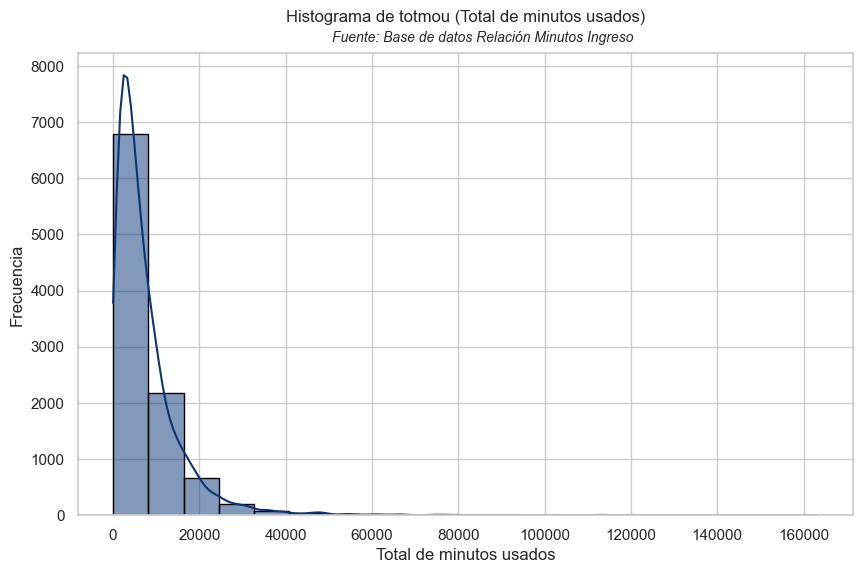

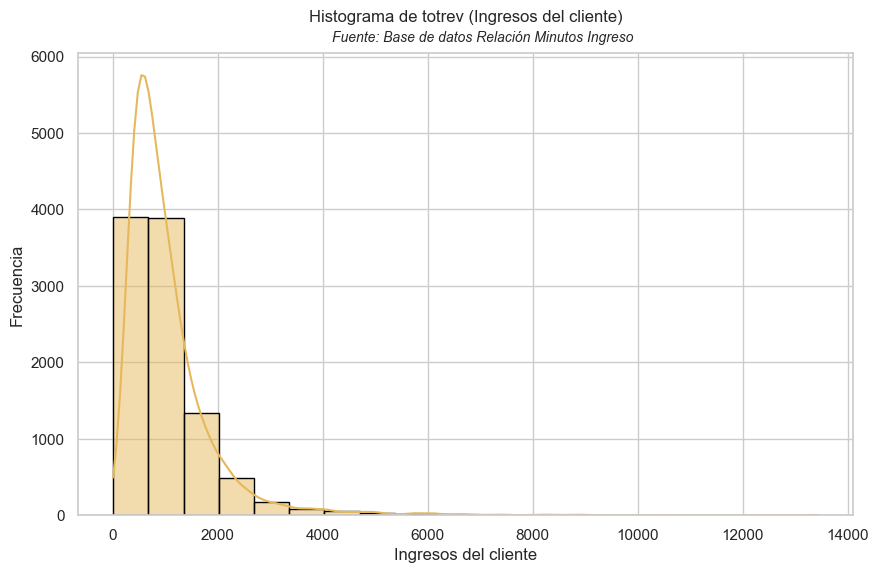

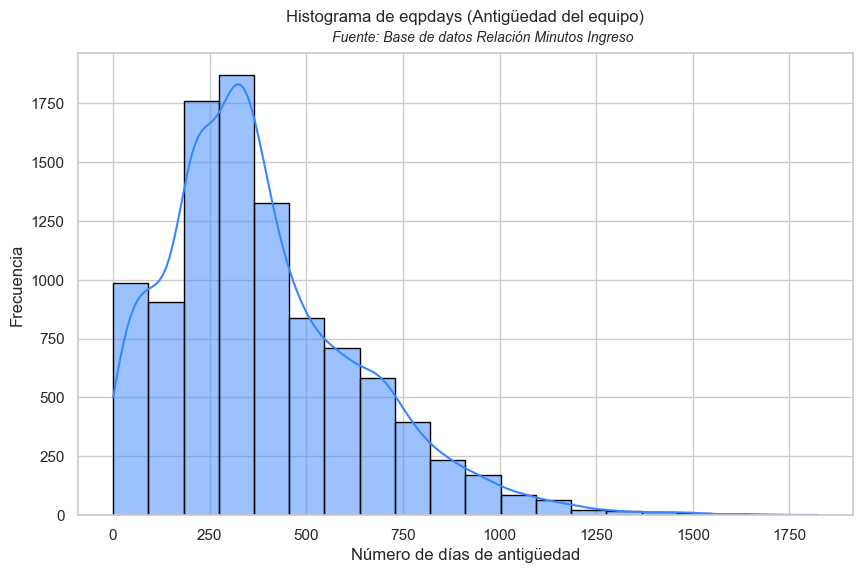

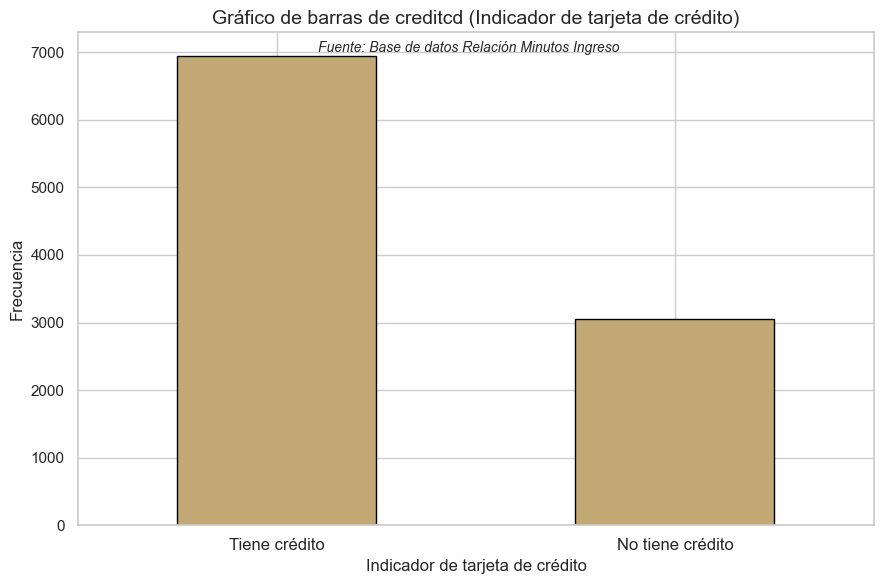

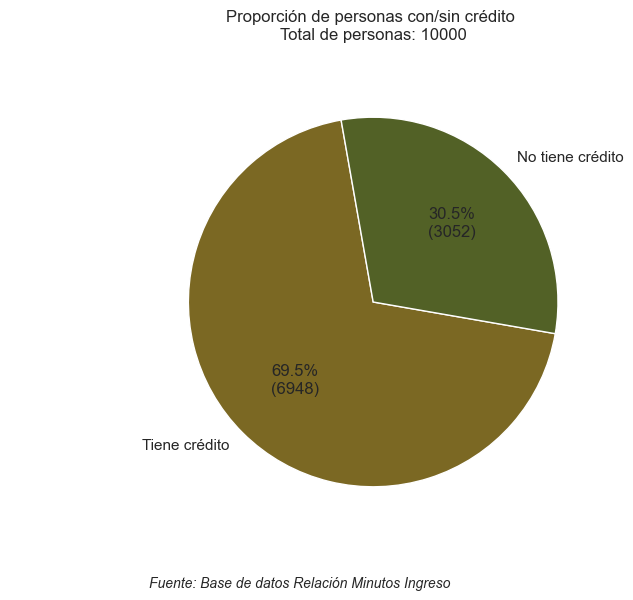

In [78]:
# Crear un histograma para las variables numéricas y un gráfico de barras para la variable categórica

# Histograma para 'totmou' (Total de minutos usados)
# configurar el estilo de los gráficos
sns.set(style='whitegrid')

# creación del histograma
plt.figure(figsize=(10,6))
sns.histplot(df['totmou'], bins=20, kde=True, color='#083578', edgecolor='black')

# título y definición de labels del gráfico
plt.title('Histograma de totmou (Total de minutos usados)', y=1.05)
plt.xlabel('Total de minutos usados')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.figtext(0.53, 0.90, 'Fuente: Base de datos Relación Minutos Ingreso', ha='center', fontsize=10, style='italic')
plt.show()



# Histograma para 'totrev' (Ingresos del cliente)
# creación del histograma
plt.figure(figsize=(10,6))
sns.histplot(df['totrev'], bins=20, kde=True, color='#E6B85C', edgecolor='black')

# título y definición de labels del gráfico
plt.title('Histograma de totrev (Ingresos del cliente)', y=1.05)
plt.xlabel('Ingresos del cliente')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.figtext(0.53, 0.90, 'Fuente: Base de datos Relación Minutos Ingreso', ha='center', fontsize=10, style='italic')
plt.show()



# Histograma para 'eqpdays' (Número de días de antigüedad del equipo)
# creación del histograma
plt.figure(figsize=(10,6))
sns.histplot(df['eqpdays'], bins=20, kde=True, color='#3887FF', edgecolor='black')

# título y definición de labels del gráfico
plt.title('Histograma de eqpdays (Antigüedad del equipo)', y=1.05)
plt.xlabel('Número de días de antigüedad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.figtext(0.53, 0.90, 'Fuente: Base de datos Relación Minutos Ingreso', ha='center', fontsize=10, style='italic')
plt.show()



# Gráfico de barras para 'creditcd' (Indicador de tarjeta de crédito)
plt.figure(figsize=(9, 6))
# Crear el gráfico de barras
df['creditcd'].value_counts(dropna=False).plot(kind='bar', color='#C2A874', edgecolor='black')

# Título y etiquetas de ejes
plt.title('Gráfico de barras de creditcd (Indicador de tarjeta de crédito)', fontsize=14)
plt.xlabel('Indicador de tarjeta de crédito', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Cambiar etiquetas del eje X
plt.xticks(ticks=[0, 1], labels=['Tiene crédito', 'No tiene crédito'], rotation=0, fontsize=12)

# Ajustar el diseño del gráfico para que todo quede dentro de la figura
plt.tight_layout()

# Añadir texto de fuente en la parte inferior del gráfico
plt.figtext(0.53, 0.90, 'Fuente: Base de datos Relación Minutos Ingreso', ha='center', fontsize=10, style='italic')

# Mostrar el gráfico
plt.show()



#Gráfico de sectores
# Contar los valores en la columna 'creditcd'
valores = df['creditcd'].value_counts()
etiquetas = ['Tiene crédito', 'No tiene crédito']

# Función personalizada para mostrar número y porcentaje
def mostrar_porcentaje_y_cantidad(pct, allvals):
    total = int(pct/100. * sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, total)

#Colores a usar
color_list = ['#7B6823','#526126']

# Calcular el total de datos por categoría 
total = df['creditcd'].count()

# Gráfico de sectores
plt.figure(figsize=(10,6))
plt.pie(valores, labels=etiquetas, autopct=lambda pct: mostrar_porcentaje_y_cantidad(pct, valores), startangle=100,colors=color_list)
plt.title(f'Proporción de personas con/sin crédito \nTotal de personas: {total}', y=1.05)
plt.annotate('Fuente: Base de datos Relación Minutos Ingreso', xy=(0.3, 0.02), xycoords='figure fraction', ha='center', fontsize=10, style='italic')
plt.show()

### **Diagrama de dispersión entre las variables totrev (Total de minutos usados) y totmou (Ingresos del cliente)**

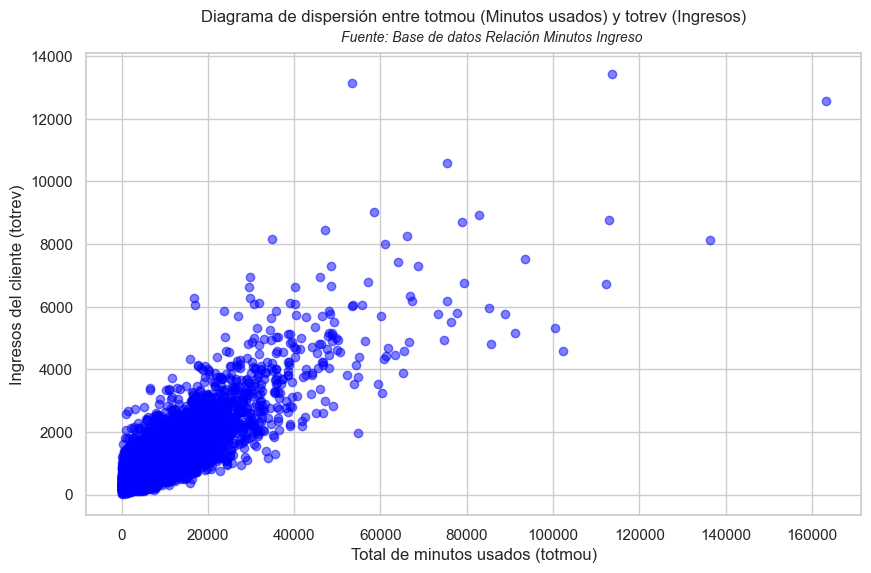

In [80]:
# Crear un diagrama de dispersión entre 'totrev' y 'totmou'
plt.figure(figsize=(10, 6))
plt.scatter(df['totmou'], df['totrev'], color='blue', alpha=0.5)
plt.title('Diagrama de dispersión entre totmou (Minutos usados) y totrev (Ingresos)', y=1.05)
plt.xlabel('Total de minutos usados (totmou)')
plt.ylabel('Ingresos del cliente (totrev)')
plt.figtext(0.53, 0.90, 'Fuente: Base de datos Relación Minutos Ingreso', ha='center', fontsize=10, style='italic')
plt.grid(True)
plt.show()

Matriz de correlación para las variables 'totmou' y 'totrev'

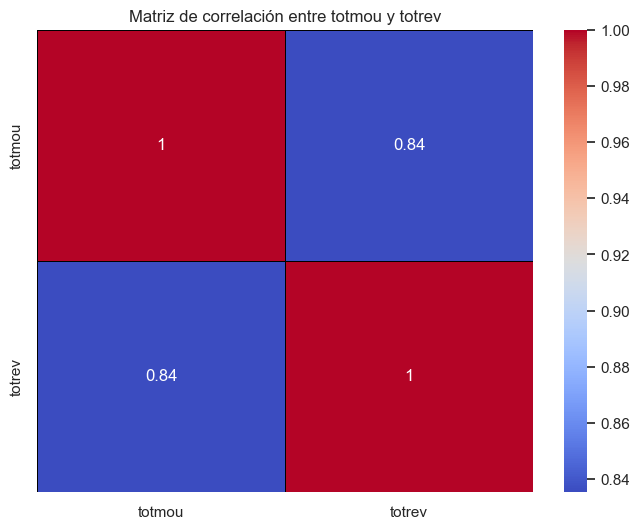

In [82]:
# Crear una matriz de correlación para las variables 'totmou' y 'totrev'
correlation_matrix = df[['totmou', 'totrev']].corr()

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Matriz de correlación entre totmou y totrev')
plt.show()

Correlación

In [84]:
# Calcular la correlación entre las columnas 'totmou' y 'totrev'
correlation_text = df['totmou'].corr(df['totrev'])

# Mostrar el valor de correlación
print(f"La correlación entre 'totmou' (Minutos usados) y 'totrev' (Ingresos) es: {correlation_text:.3f}")


La correlación entre 'totmou' (Minutos usados) y 'totrev' (Ingresos) es: 0.835


**Conclusión:**

1. Existe una relación positiva entre el uso de minutos y los ingresos. Es decir, a medida que aumenta el número de minutos usados, los ingresos también tienden a aumentar.
2. Sin embargo, la relación no es perfectamente lineal, ya que hay valores atípicos (outliers) donde algunos clientes generan ingresos altos con un uso moderado de minutos o, al contrario, usan muchos minutos pero generan ingresos más bajos.
3. La mayoría de los puntos se concentran en los rangos de 0 a 40,000 minutos y 0 a 4,000 de ingresos, lo que indica que la mayoría de los clientes están en ese rango de uso y contribución de ingresos.

Este análisis sugiere que, en general, los clientes que usan más minutos tienden a generar más ingresos, pero hay variabilidad en la relación, especialmente en los valores más extremos.

### **¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?**
Sí, existe una relación positiva entre el total de minutos usados por los clientes y los ingresos generados por ellos. A medida que los clientes usan más minutos, tienden a generar más ingresos para la compañía. Sin embargo, la relación no es perfectamente lineal, ya que algunos clientes presentan comportamientos atípicos (outliers), donde a pesar de un uso elevado o bajo de minutos, generan ingresos inusuales.

La mayoría de los clientes se concentran en rangos de uso moderado de minutos e ingresos, lo que indica que un mayor uso generalmente está asociado con un mayor ingreso. Esta relación puede ser aprovechada por la empresa para optimizar sus estrategias de marketing y segmentación de clientes, enfocándose en aquellos que utilizan más minutos y generar así mayores ingresos.

### **Diagrama de dispersión con leyenda que indique si tiene crédito o no**

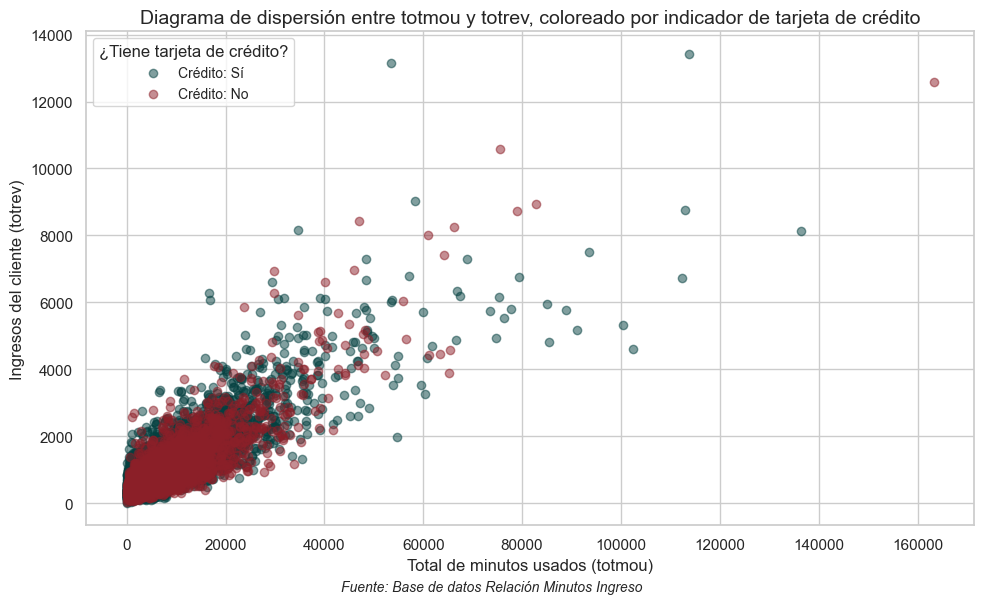

<Figure size 1000x400 with 0 Axes>

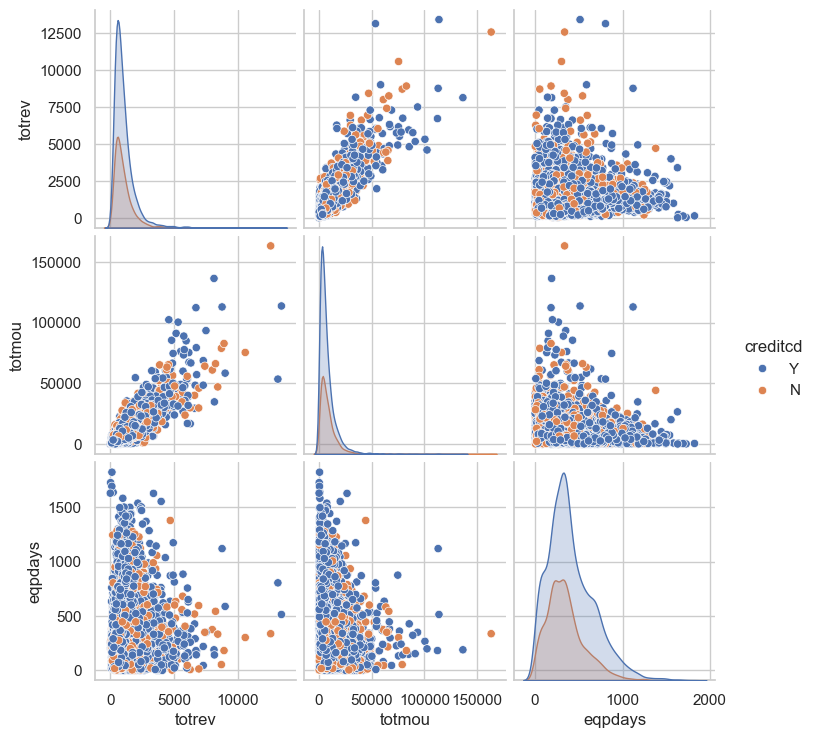

In [88]:
# Asignar colores según si tiene o no tarjeta de crédito
colors = {'Y': '#044040', 'N': '#8C1F28'}

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))

# Diagrama de dispersión donde el color depende de si tiene o no tarjeta de crédito
for credit_status in df['creditcd'].unique():
    subset = df[df['creditcd'] == credit_status]
    # Reemplazar Y por "Sí" y N por "No"
    label = 'Sí' if credit_status == 'Y' else 'No'
    plt.scatter(subset['totmou'], subset['totrev'], 
                color=colors.get(credit_status, 'blue'), alpha=0.5, label=f"Crédito: {label}")

# Títulos y etiquetas
plt.title('Diagrama de dispersión entre totmou y totrev, coloreado por indicador de tarjeta de crédito', fontsize=14)
plt.xlabel('Total de minutos usados (totmou)', fontsize=12)
plt.ylabel('Ingresos del cliente (totrev)', fontsize=12)

# Leyenda
plt.legend(title='¿Tiene tarjeta de crédito?', loc='upper left', fontsize=10)

# Ajustar el texto de la fuente debajo del título
plt.figtext(0.5, 0.000003, 'Fuente: Base de datos Relación Minutos Ingreso', ha='center', fontsize=10, style='italic')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Gráfico pairplot (si es necesario)
plt.figure(figsize=(10, 4))
sns.pairplot(data=df, hue='creditcd', vars=['totrev','totmou','eqpdays'])
plt.show()

**Conclusión:**

1. Clientes con tarjeta de crédito (Y) tienden a generar ingresos mayores y usar más minutos que los clientes sin tarjeta de crédito. Esto sugiere que la posesión de una tarjeta de crédito está asociada con un mayor nivel de uso de los servicios y mayores ingresos para la empresa.
2. Clientes sin tarjeta de crédito (N) tienden a estar más concentrados en la zona de menores ingresos y menor uso de minutos.
3. En resumen, el hecho de tener tarjeta de crédito parece estar relacionado con un mayor uso de minutos y mayores ingresos, lo que podría indicar que los clientes con tarjetas de crédito son más valiosos para la empresa.